<a href="https://colab.research.google.com/github/ShubhamP1028/DeepLearningTute/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('stock_data.csv')
df.head()

,Unnamed: 0,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
0,2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
1,2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2,2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
3,2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
4,2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283


*  Stock_1 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the dataset.


*  Stock_2 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the dataset.


*  Stock_3 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the dataset.


*  Stock_4 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the dataset.


*  Stock_5 >>
Columns representing the closing prices of N stocks. Each column contains the closing prices of a specific stock for each date in the

In [5]:
df = df.rename(columns={'Unnamed: 0': 'Date'})

In [6]:
print(df.isnull().sum(),'\n')
print(df.info(),'\n')
print(df.describe())

Date       0
Stock_1    0
Stock_2    0
Stock_3    0
Stock_4    0
Stock_5    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     365 non-null    object 
 1   Stock_1  365 non-null    float64
 2   Stock_2  365 non-null    float64
 3   Stock_3  365 non-null    float64
 4   Stock_4  365 non-null    float64
 5   Stock_5  365 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.2+ KB
None 

          Stock_1     Stock_2     Stock_3     Stock_4     Stock_5
count  365.000000  365.000000  365.000000  365.000000  365.000000
mean   107.772577   81.105216   94.519502  117.407560  106.866865
std      7.398296   11.435212    6.519213    6.778527    3.760968
min     91.474442   62.414219   81.111434   99.909756   99.833309
25%    101.603117   69.328263   89.788068  112.209912  103.927072
50%    107.421299   84.283525   94.495546  

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

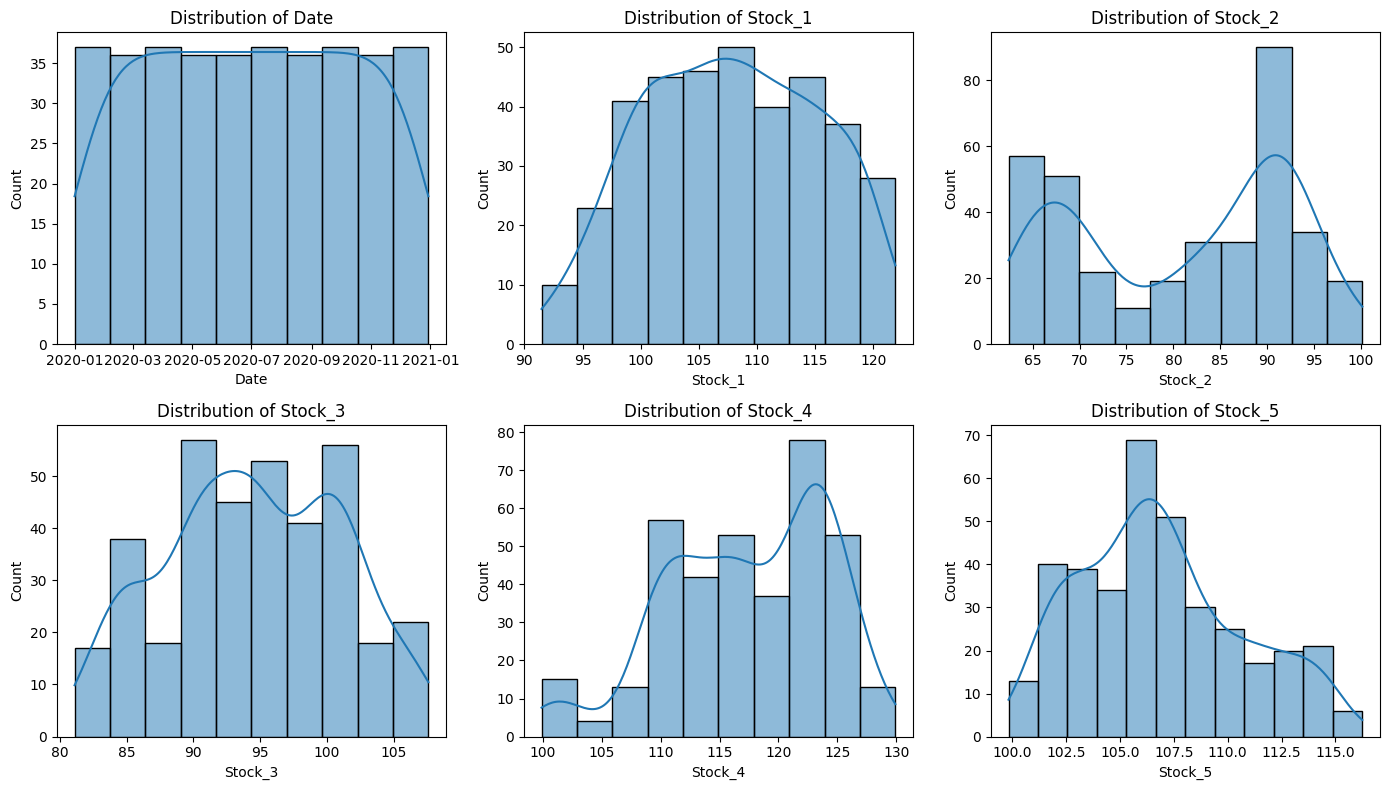

In [8]:
plt.figure(figsize=(14, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

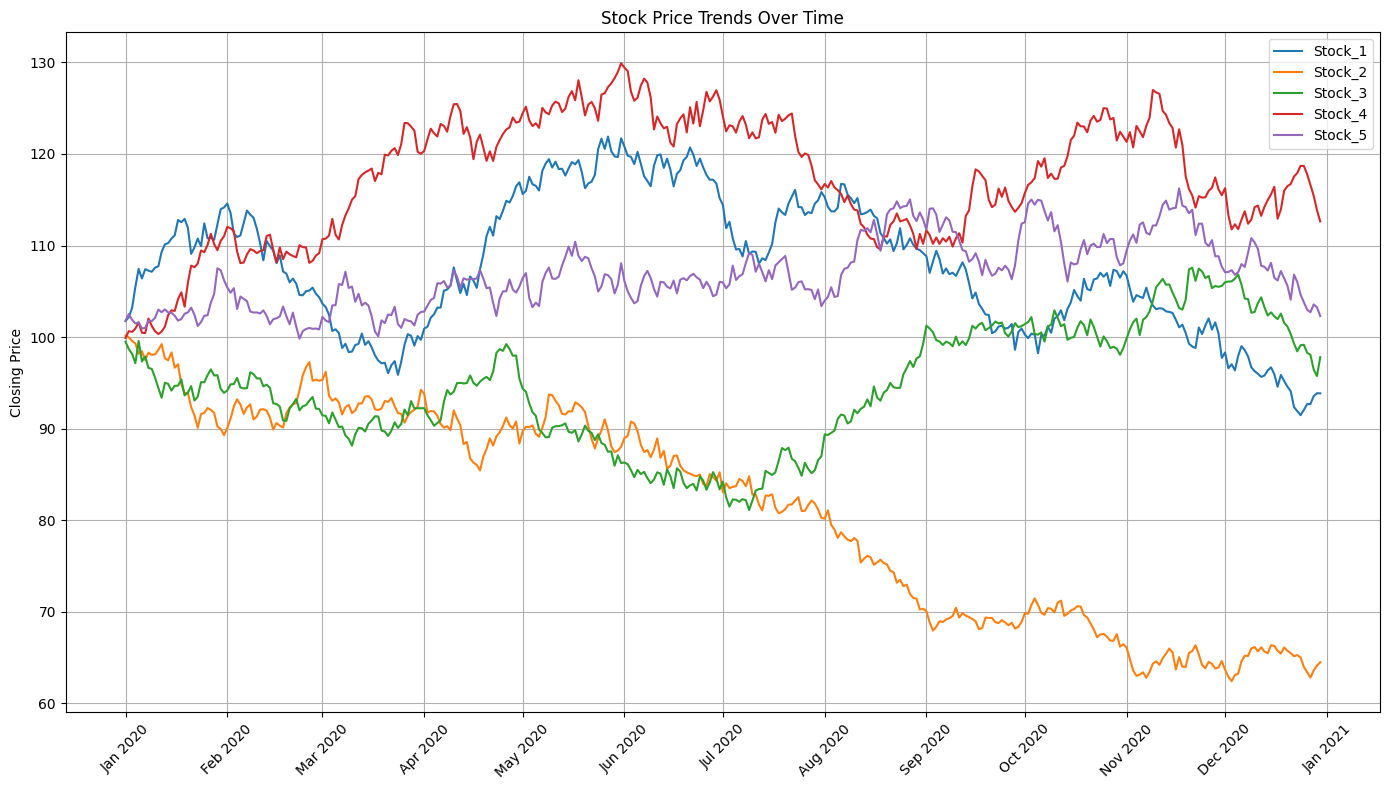

In [9]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 8))
for column in df.columns[1:]:  # Skip the 'Date' column
    plt.plot(df['Date'], df[column], label=column)  # Use the Date column directly

plt.title('Stock Price Trends Over Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Format x-axis to show months
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks at the beginning of each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2023'

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

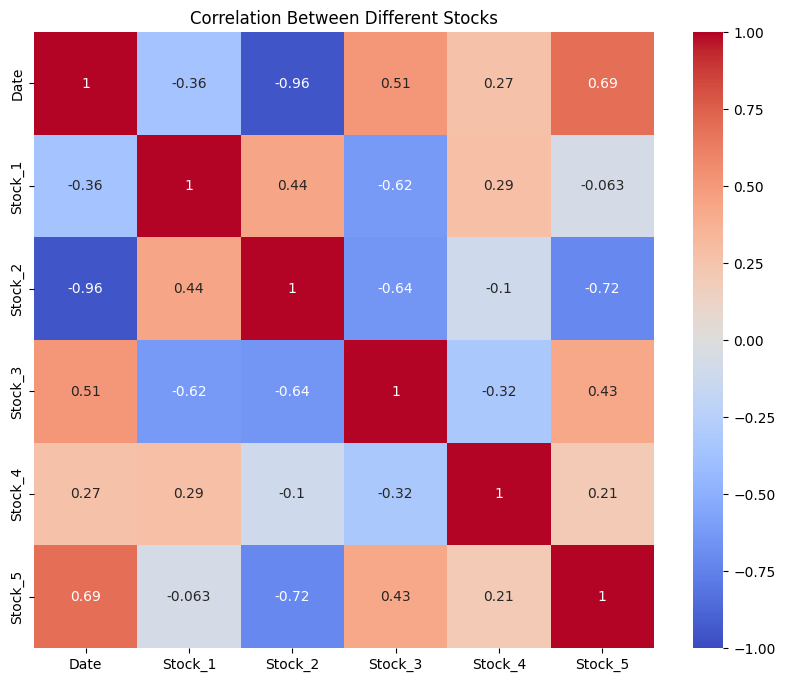

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Different Stocks')
plt.show()

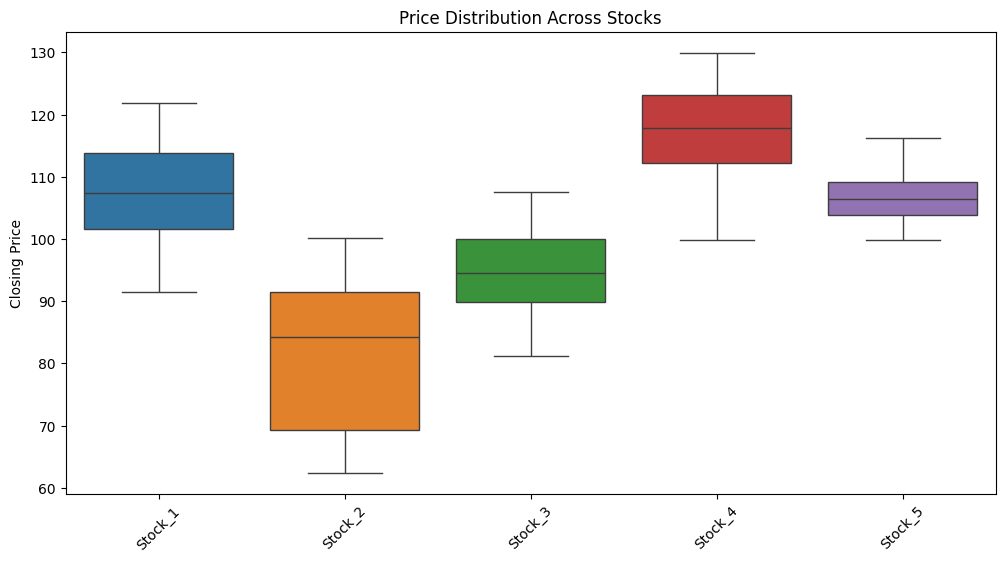

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Price Distribution Across Stocks')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()

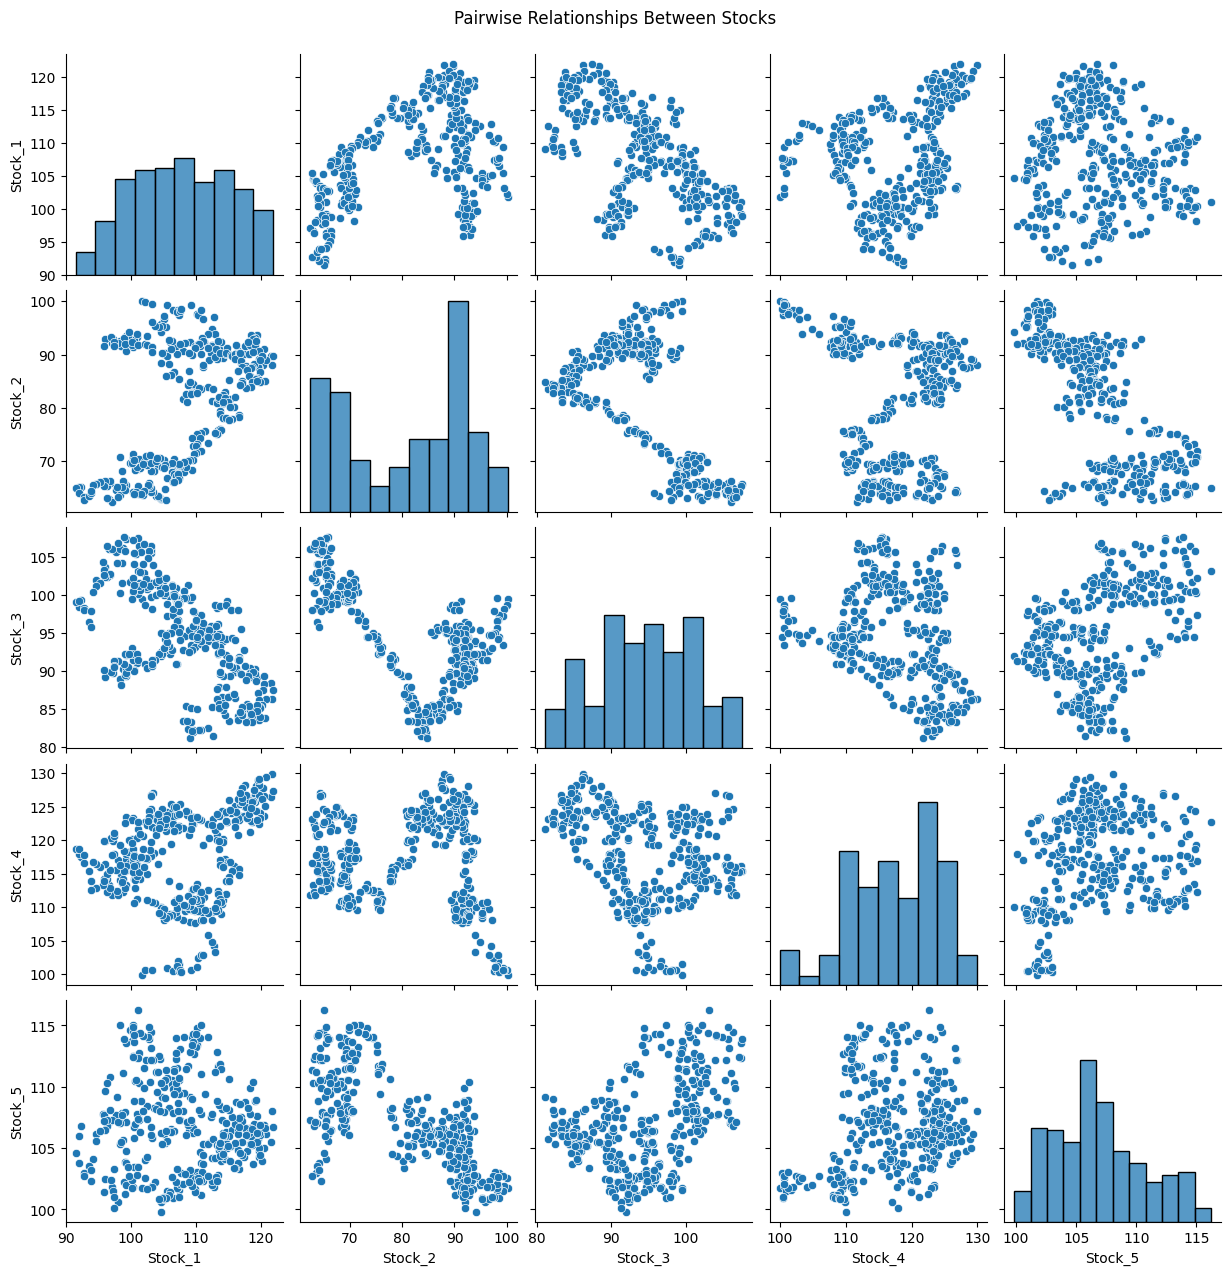

In [16]:
sns.pairplot(df)
plt.suptitle('Pairwise Relationships Between Stocks', y=1.02)
plt.show()